In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/amazon.csv", encoding='latin1')

In [5]:
month_map = {
   'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March',
   'Abril': 'April', 'Maio': 'May', 'Junho': 'June',
   'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September',
   'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'
}

df['month'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(df['month'] + ' ' + df['year'].astype(str), format='%B %Y')
df.set_index('date', inplace=True)

In [7]:
df_monthly = df.resample('M')['number'].sum()

In [12]:
model = ARIMA(df_monthly, order=(1, 1, 1))
model_fit = model.fit()

In [13]:
forecast = model_fit.forecast(steps=12)

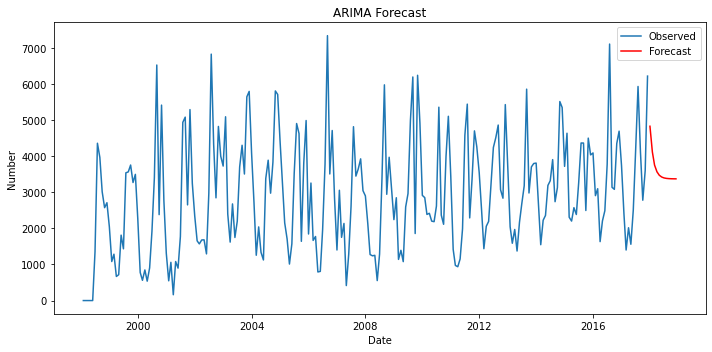

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df_monthly, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend()
plt.tight_layout()
plt.show()